In [39]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from crate_graph import crate_graph, ShowGraph, create_subgraph
import time

   Source  Destination  weight
0       0            1       8
1       0           10       2
2       0           13      14
3       0           14      15
4       0           16       3
Graph with 200 nodes and 2961 edges recreated Graph


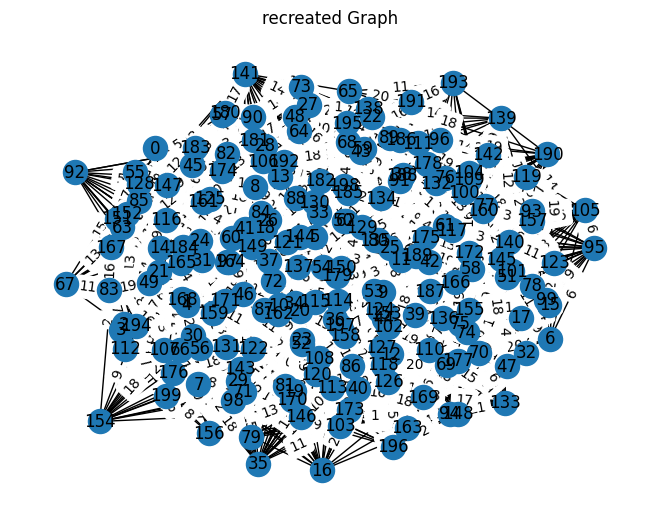

Graph recreated successfully!
The graph has 200 node.


In [40]:
G= crate_graph("graph_data_with_weights.xlsx")
num_nodes = G.number_of_nodes()
print (f"Graph recreated successfully!")
print (f"The graph has {num_nodes} node.")

In [41]:
#initail Q table and Reward table
Q=np.matrix(np.zeros(shape=(num_nodes,num_nodes)))
Q-=100

In [42]:
goal_state = int(input("enter goal state:"))

In [43]:
#calculate the reward
def calculate_reward(state, next_state, graph):
    if next_state == goal_state:
        return 1000
    
    elif graph.has_edge(state, next_state):
        weight = graph[state][next_state]['weight']
        return -(1/weight)
    
    else:
        return -1000

In [44]:
def next_number(start, er):
    random_value = random.uniform(0, 1)
    if random_value < er:
        sample = list(G[start])
    else:
        sample = np.where(Q[start, ].A1 == np.max(Q[start, ].A1))[0]
    next_node = int(np.random.choice(sample))
    return next_node

In [45]:
def updateQ(node1, node2, lr, discount):
    max_index = np.where(Q[node2, ].A1 == np.max(Q[node2, ].A1))[0]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[node2, max_index]
    reward = calculate_reward(node1, node2, G)
    Q[node1, node2] = (1 - lr) * Q[node1, node2] + lr * (reward + discount * max_value)


In [46]:
def learn(er, lr, discount):
    for i in range(5000):
        start = np.random.randint(0, num_nodes)
        next_node = next_number(start, er)
        updateQ(start, next_node, lr, discount)

In [47]:
while True:
    exploration_rate = float(input("Enter the exploration rate (0.0 - 1.0): "))
    learning_rate = float(input("Enter the learning rate (0.0 - 1.0): "))
    discount_rate = float(input("Enter the discount rate (0.0 - 1.0): "))
    if 0.0 <= exploration_rate <= 1.0 and 0.0 <= learning_rate <= 1.0 and 0.0 <= discount_rate <= 1.0:
        break

learn(exploration_rate, learning_rate, discount_rate)
print("learn completed!")

learn completed!


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16492\495685761.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16492\495685761.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


In [48]:
def shortest_path(begin, end):
    path = [begin]
    next_node = np.argmax(Q[begin, ].A1)
    path.append(next_node)
    while next_node != end:
        next_node = np.argmax(Q[next_node, ].A1)
        path.append(next_node)
    return path

[0, 194, 133, 96, 36, 93, 190]
Graph with 7 nodes and 7 edges Q-learning path graph


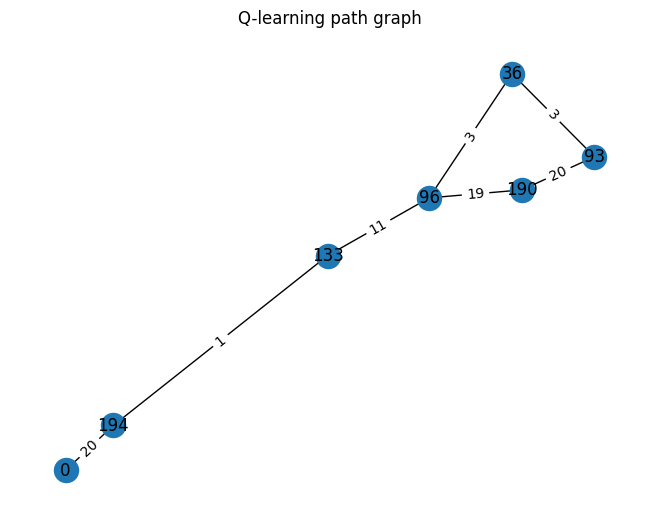

the sum of the weight from begin to goal node is: 58
the execution time of Q-learning algorithm is: 0.0


In [49]:
start_time = time.time()
q_learning_shortest_path = shortest_path(0, goal_state)
end_time = time.time()
exec_time = end_time - start_time
print(q_learning_shortest_path)
H, sum = create_subgraph(G, q_learning_shortest_path)
ShowGraph(H, "Q-learning path graph")
print(f"the sum of the weight from begin to goal node is: {sum}")
print(f"the execution time of Q-learning algorithm is: {exec_time}")

[0, 10, 186, 193, 190]
Graph with 5 nodes and 5 edges dijkstra path graph


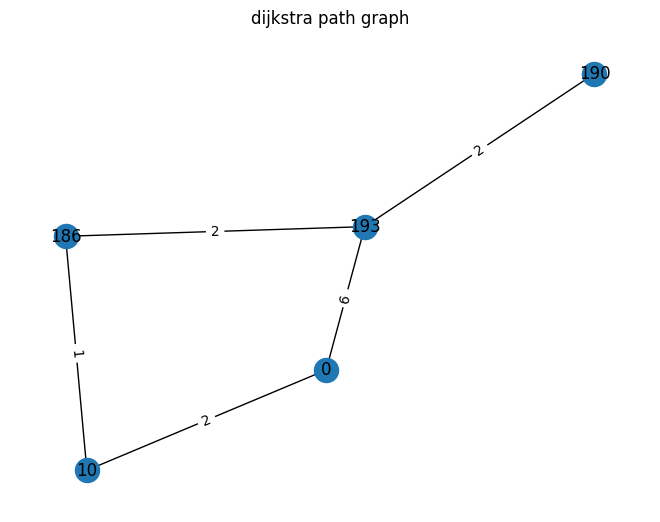

the sum of the weight from begin to goal node is: 7
the execution time of dijkstra algorithm is: 0.0029990673065185547


In [50]:
start_time = time.time()
dijkstra_shortest_path = nx.dijkstra_path(G, 0, goal_state, weight='weight')
end_time = time.time()
exec_time = end_time - start_time
print(dijkstra_shortest_path)
H, sum = create_subgraph(G, dijkstra_shortest_path)
ShowGraph(H, "dijkstra path graph")
print(f"the sum of the weight from begin to goal node is: {sum}")
print(f"the execution time of dijkstra algorithm is: {exec_time}")